In [20]:
pip install lime



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install shap


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np

In [24]:
iris = load_iris()

In [25]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']])

In [40]:
X = df.iloc[:,:4]
y = df['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [42]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']])

In [43]:
df.columns = ['sep_length', 'sep_width', 'pet_length', 'pet_width', 'target']

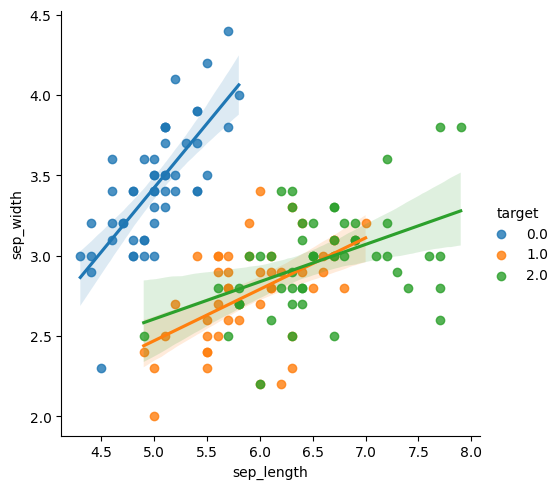

In [44]:
sns.lmplot(x='sep_length', y='sep_width', hue='target', data=df)

In [45]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [46]:
from sklearn.metrics import accuracy_score
rf_pred = rf_model.predict(X_test)
print(accuracy_score(rf_pred,y_test))
lr_pred = lr_model.predict(X_test)
print(accuracy_score(lr_pred,y_test))

0.8333333333333334
0.8666666666666667


## Explaining the Model

In [47]:
rf_importance = rf_model.feature_importances_
print(rf_importance)

lr_importance = lr_model.coef_
print(lr_importance)

[0.10043952 0.0111465  0.38815203 0.50026196]
[[-0.47100443  0.82523085 -2.30589344 -1.0084924 ]
 [ 0.4843671  -0.54762742 -0.09140297 -1.01500808]
 [-0.01336266 -0.27760343  2.39729641  2.02350048]]


In [48]:
import shap
import lime

In [49]:
shap.initjs() # visualizations render in Jupyter

In [50]:
explainer = shap.Explainer(rf_model)

In [51]:
shap_values = explainer.shap_values(X_test)

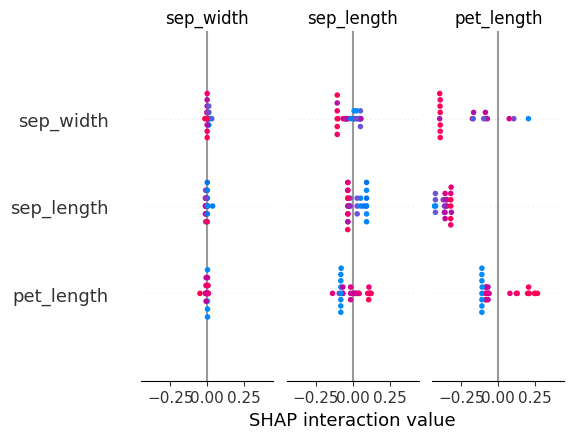

In [52]:
shap.summary_plot(shap_values, X_test, show=False, max_display=4)

In [53]:
X_test.shape

(30, 4)

In [54]:
shap_values[0]

array([[-0.03315835,  0.0236499 ,  0.00950846],
       [-0.0060777 ,  0.00542379,  0.00065391],
       [-0.17438612,  0.26001295, -0.08562683],
       [-0.12887782,  0.38766336, -0.25878554]])

In [55]:
shap.force_plot(explainer.expected_value[0], explainer.shap_values(X_test.iloc[0]))

In [56]:
shap.dependence_plot(shap_values[0], X_test)

AttributeError: 'NoneType' object has no attribute 'shape'